# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends
- Cities closer to the equator have higher maximum temperatures.
    - Supported by the known fact the middle latitudes receive increased duration of sunlight.
- Cloud cover is independent of city latitude.
- Humidity and latitude appear to be very loosly correlated, but of the cities selected a higher percentage had humidity % greater than 50%

In [1]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from api_keys import weather_api_key
from random import choice, random, seed
import numpy as np
import scipy.stats as sts
from datetime import datetime
city_name = ''
base = 'api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format(city_name,weather_api_key)


## Generate Cities List

In [2]:
seed(40)
# creates number range
lats = np.arange(-55.0,85.0,.1)
lon = np.arange(-180,180,.1)

#randomly selects numbers from above range to create cooridnate pairs
coords = []
for i in range(1000):
    coords.append([])
    coords[i].append(choice(lats))
    coords[i].append(choice(lon))

#remove duplicate coordinates
c_group = []
for lat,lng in coords:
    c_group.append((lat,lng))
c_group = set(c_group)

#locate cities from coords using citipy
city_objects = []
for lt, lg in c_group:
    city_objects.append((((vars(citipy.nearest_city(lt,lg)).values())),lt,lg))
cities_df = pd.DataFrame({"nearest_city_name" : [list(x)[0] for x in [values[0] for values in city_objects]],
              'nearest_country_code' : [list(x)[1] for x in [values[0] for values in city_objects]],
              'lat' : [values[1] for values in city_objects],
              'lg':[values[2] for values in city_objects] })

unique_cities = cities_df.drop_duplicates(subset = 'nearest_city_name')
unique_cities[unique_cities.duplicated(subset='nearest_city_name')]
unique_cities

,nearest_city_name,nearest_country_code,lat,lg
0,clyde river,ca,72.4,-82.0
1,saint-philippe,re,-32.3,60.0
2,east london,za,-42.6,35.0
3,puerto ayora,ec,-13.1,-110.0
4,bredasdorp,za,-44.9,22.9
...,...,...,...,...
987,tongchuan,cn,35.2,108.7
988,kisangani,cd,0.5,26.2
991,marti,cu,22.9,-81.0
997,presidente epitacio,br,-21.8,-52.1


In [3]:
#calls weather data from openweathermap and parses info into dictionary which then appends to a list 'to_df'
to_df = []
to_keep = ['main','clouds','wind','sys','coord','name','dt']
broken_cities = []
i = 0
print("""Beginning Data Retrieval     
-----------------------------
        """)
for city in unique_cities['nearest_city_name']:
    try:
        
        city_name = city
        base = 'http://api.openweathermap.org/data/2.5/weather?q={}&units=imperial&appid={}'.format(city_name,weather_api_key)
        print(f'Processing record {i} | {city}')
        reBuild = {x : requests.get(base).json()[x] for x in to_keep}
        reBuild['humidity'] = reBuild['main']['humidity']
        reBuild['temp_max'] = reBuild['main']['temp_max']
        reBuild['country'] = reBuild['sys']['country']
        reBuild['clouds'] = reBuild['clouds']['all']
        reBuild['wind'] = reBuild['wind']['speed']
        reBuild['lng'],reBuild['lat'] = reBuild.pop('coord').values()
        reBuild['Date'] = datetime.utcfromtimestamp(reBuild['dt']).strftime("%m/%d/%Y")
        del reBuild['sys'],reBuild['main'],reBuild['dt']
        to_df.append(reBuild)
        i+=1
    except KeyError:
        broken_cities.append(city)
        i+=1
        print('City Not Found')

    


Beginning Data Retrieval     
-----------------------------
        
Processing record 0 | clyde river
Processing record 1 | saint-philippe
Processing record 2 | east london
Processing record 3 | puerto ayora
Processing record 4 | bredasdorp
Processing record 5 | hilo
Processing record 6 | avarua
Processing record 7 | dekar
Processing record 8 | provideniya
Processing record 9 | cabo san lucas
Processing record 10 | eyl
Processing record 11 | longyan
Processing record 12 | auki
Processing record 13 | khonuu
City Not Found
Processing record 14 | kapaa
Processing record 15 | krasnoselkup
Processing record 16 | nikolskoye
Processing record 17 | shcherbynivka
Processing record 18 | nurota
Processing record 19 | christchurch
Processing record 20 | chuy
Processing record 21 | jamestown
Processing record 22 | bokoro
Processing record 23 | ust-ilimsk
Processing record 24 | hobart
Processing record 25 | rikitea
Processing record 26 | hithadhoo
Processing record 27 | adrar
Processing record 28 |

Processing record 238 | burica
City Not Found
Processing record 239 | lagoa
Processing record 240 | bay roberts
Processing record 241 | ust-nera
Processing record 242 | pakxan
Processing record 243 | sao joao da barra
Processing record 244 | mecca
Processing record 245 | caravelas
Processing record 246 | margate
Processing record 247 | samusu
City Not Found
Processing record 248 | flinders
Processing record 249 | podosinovets
Processing record 250 | ler
Processing record 251 | okhotsk
Processing record 252 | zhanaozen
Processing record 253 | mayumba
Processing record 254 | amazar
Processing record 255 | great bend
Processing record 256 | esperance
Processing record 257 | san cristobal
Processing record 258 | altay
Processing record 259 | chokurdakh
Processing record 260 | padang
Processing record 261 | tumannyy
City Not Found
Processing record 262 | pontianak
Processing record 263 | bad salzungen
Processing record 264 | lohr
Processing record 265 | doka
Processing record 266 | butarita

Processing record 478 | lapua
Processing record 479 | komatipoort
Processing record 480 | ternate
Processing record 481 | hunza
City Not Found
Processing record 482 | kaitong
Processing record 483 | moron
Processing record 484 | naron
Processing record 485 | koslan
Processing record 486 | nieuw amsterdam
Processing record 487 | kuche
City Not Found
Processing record 488 | hambantota
Processing record 489 | hofn
Processing record 490 | tual
Processing record 491 | verkhnetulomskiy
Processing record 492 | ximei
Processing record 493 | mangrol
Processing record 494 | tukrah
Processing record 495 | kurchum
Processing record 496 | katsuura
Processing record 497 | klaksvik
Processing record 498 | ponta delgada
Processing record 499 | tivaouane
Processing record 500 | zhanatas
City Not Found
Processing record 501 | creel
Processing record 502 | ambilobe
Processing record 503 | falam
Processing record 504 | kenora
Processing record 505 | ayan
Processing record 506 | cayenne
Processing record 5

In [4]:
# create dataframe out of parsed data and saves to csv
ta_daa = pd.DataFrame(to_df)[['name','country','lng','lat','humidity','wind','clouds','temp_max','Date']]

ta_daa = ta_daa.rename(columns = {"name":'Name',
                                  'country':'Country',
                                 'lng':'Lng',
                                 'lat':'Lat',
                                 'humidity':'Humidity (%)',
                                 'wind':'Wind (mph)',
                                 'temp_max':'Max Temp (F)',
                                 'clouds':'Clouds (%)'})
ta_daa.to_csv('finally.csv')
ta_daa

,Name,Country,Lng,Lat,Humidity (%),Wind (mph),Clouds (%),Max Temp (F),Date
0,Clyde River,CA,-68.59,70.47,74,29.97,90,37.40,10/18/2020
1,Saint-Philippe,RE,55.77,-21.36,64,5.82,38,69.80,10/18/2020
2,East London,ZA,27.91,-33.02,79,11.45,100,65.01,10/18/2020
3,Puerto Ayora,EC,-90.35,-0.74,85,5.01,96,71.01,10/18/2020
4,Bredasdorp,ZA,20.04,-34.53,93,4.70,100,53.60,10/18/2020
...,...,...,...,...,...,...,...,...,...
516,Tongchuanshi,CN,109.09,35.08,37,1.12,61,58.87,10/18/2020
517,Kisangani,CD,25.20,0.52,97,1.21,100,69.66,10/18/2020
518,Martí,CU,-80.92,22.95,94,5.82,40,75.20,10/18/2020
519,Presidente Epitácio,BR,-52.12,-21.76,50,11.34,94,76.01,10/18/2020


In [11]:
#function that creates graph of selected city metric vs latitude, places regression fit, and saves as png
def pulled_pork(y,hem = None,reg = False):
    f_name = y.name + " "
    if hem == 'north':
        x = ta_daa[ta_daa['Lat'] >= 0]
        x = x['Lat']
        y = y.loc[ta_daa['Lat'] >= 0]
        f_name += 'n'
    elif hem == 'south':
        x = ta_daa[ta_daa['Lat'] <= 0]
        x = x['Lat']
        y = y.loc[ta_daa['Lat'] <= 0]
        f_name += 's'
    else:
        x = ta_daa['Lat']
        f_name += 'w'
    
    if reg == True:
        slope, intercept, rvalue, pvalue, stderr = sts.linregress(x,y)
        line = f'y = {round(slope,2)}*x + {round(intercept,2)}'
        plt.plot(x, slope*x + intercept, color = 'red')
        plt.annotate(line,(10,10),xycoords = 'figure pixels',color = 'red')
        print(line)
        print('The R-Squared is:',rvalue**2)
        f_name += 'reg'
    else:
        f_name += 'noreg'
        
    plt.scatter(x,y)
    plt.xlabel('{}'.format(x.name.upper()))
    plt.ylabel('{}'.format(y.name.upper()))
    plt.title('{} vs. {} Plot'.format(x.name.upper(),y.name.upper()))
    plt.savefig(f'{f_name}.png')

## Latitude vs. Temperature Plot

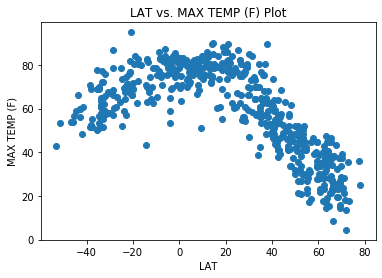

In [12]:
pulled_pork(ta_daa['Max Temp (F)'])

## Latitude vs. Humidity Plot

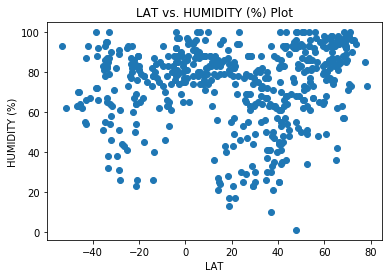

In [13]:
pulled_pork(ta_daa['Humidity (%)'])

## Latitude vs. Cloudiness Plot

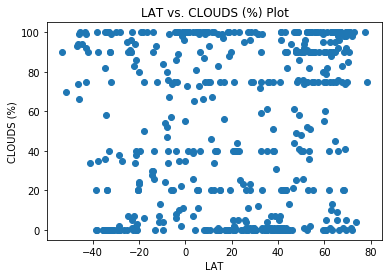

In [14]:
pulled_pork(ta_daa['Clouds (%)'])

## Latitude vs. Wind Speed Plot

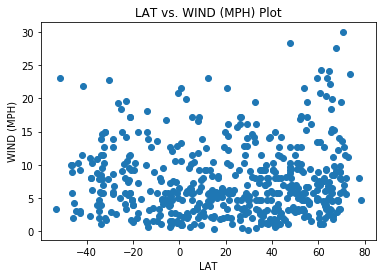

In [15]:
pulled_pork(ta_daa['Wind (mph)'])

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.9*x + 89.6
The R-Squared is: 0.7779544485910403


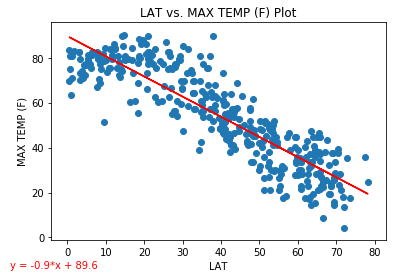

In [16]:
pulled_pork(ta_daa['Max Temp (F)'],hem = 'north', reg = True)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.51*x + 80.14
The R-Squared is: 0.44278983612743933


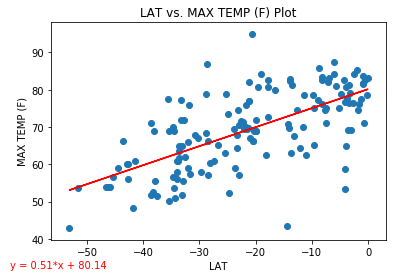

In [17]:
pulled_pork(ta_daa['Max Temp (F)'], hem = 'south', reg = True)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.18*x + 66.6
The R-Squared is: 0.029933075815218563


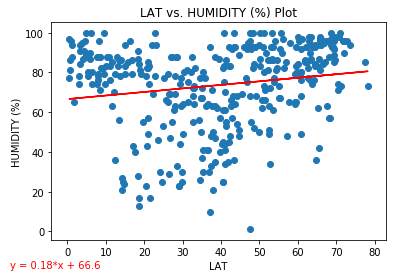

In [18]:
pulled_pork(ta_daa['Humidity (%)'], hem = 'north', reg = True)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.21*x + 77.69
The R-Squared is: 0.029463487832160577


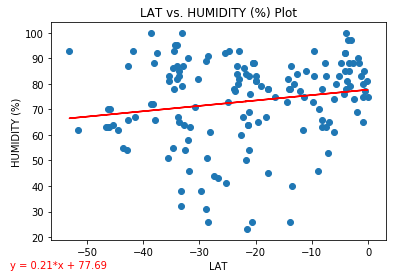

In [19]:
pulled_pork(ta_daa['Humidity (%)'], hem = 'south', reg = True)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.34*x + 38.23
The R-Squared is: 0.02927857064304076


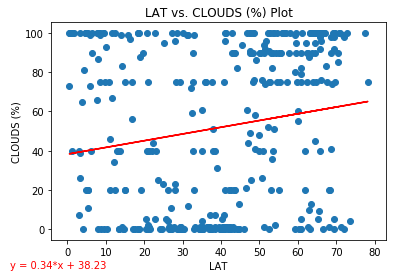

In [20]:
pulled_pork(ta_daa['Clouds (%)'], hem = 'north', reg = True)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.01*x + 51.28
The R-Squared is: 5.501068657593036e-06


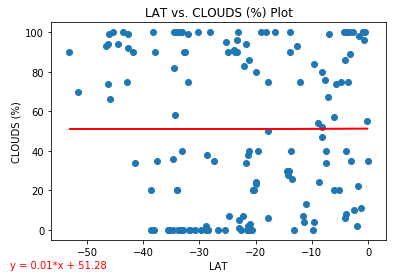

In [21]:
pulled_pork(ta_daa['Clouds (%)'], hem = 'south', reg = True)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04*x + 6.16
The R-Squared is: 0.018983018509280386


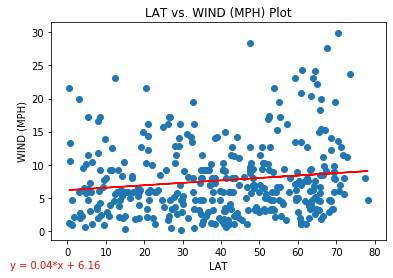

In [22]:
pulled_pork(ta_daa['Wind (mph)'], hem = 'north', reg = True)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07*x + 6.13
The R-Squared is: 0.03370657575719096


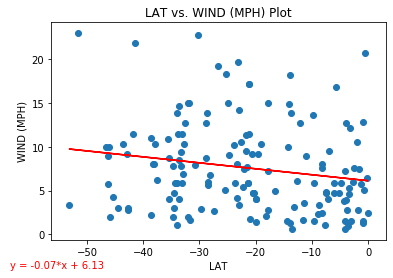

In [23]:
pulled_pork(ta_daa['Wind (mph)'], hem = 'south', reg = True)